In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
import torch
# Does this fix the hdf5 multiprocessing bug?
torch.multiprocessing.set_start_method("spawn")

# !git clone https://github.com/guydav/deep-learning-projects.git
# !pip install -q -r deep-learning-projects/requirements.txt
!wandb login 9676e3cc95066e4865586082971f2653245f09b4
sys.path.extend(('/home/cc/deep-learning-projects', '/home/cc/src/tqdm'))

Appending key for api.wandb.ai to your netrc file: /home/cc/.netrc
Successfully logged in to Weights & Biases!


In [3]:
import projects
from projects.metalearning import *

## Load the dataset

This time with 3x the batch size, 1.5k

In [4]:
ML_50K = '/home/cc/meta_learning_50k.h5'

normalized_train_dataset, train_dataloader, normalized_test_dataset, test_dataloader = \
        create_normalized_datasets(dataset_path=ML_50K, 
                                   batch_size=1500,
                                   num_workers=4,
                                   downsample_size=None,
                                   should_flip=False,
                                   return_indices=False,
                                   dataset_class_kwargs=dict(
                                       num_dimensions=3,
                                       features_per_dimension=(10, 10, 10)
                                   ))

Splitting test-train at 45000
Loaded normalization from cache
[0.4644661  0.45839542 0.45069984]
[0.11204559 0.11298621 0.12539756]


In [5]:
current_epoch = 0
save_dir = '/home/cc/checkpoints'

large_batch_no_dropout_test_model = PoolingDropoutCNNMLP(
    query_length=30,
    conv_filter_sizes=(16, 32, 48, 64),
    conv_output_size=4480, 
    mlp_layer_sizes=(512, 512, 512, 512),
    lr=5e-4, 
    weight_decay=0, 
    conv_dropout=False,
    mlp_dropout=True,
    name='mlp_dropout_no_decay_50k_cnn_mlp_large_batch',
    save_dir=save_dir)

large_batch_no_dropout_test_model.load_model(current_epoch)
large_batch_no_dropout_test_model = large_batch_no_dropout_test_model.cuda()

512


In [6]:
# os.environ['WANDB_RUN_ID'] ='98w3kzlw'
# os.environ['WANDB_RESUME'] = 'must'
wandb.init(entity='meta-learning-scaling', project='sequential-benchmark') #, resume=True)

current_model = large_batch_no_dropout_test_model

wandb.config.lr = current_model.lr
wandb.config.decay = current_model.weight_decay
wandb.config.loss = 'CE'
wandb.config.batch_size = train_dataloader.batch_size

W&B Run: https://app.wandb.ai/meta-learning-scaling/sequential-benchmark/runs/0de5ylqo
Call `%%wandb` in the cell containing your training loop to display live results.


2019-02-11 18:48:36: After epoch 1, TRAIN acc is 54.6367, loss is 0.6849, AUC is 0.5140
2019-02-11 18:49:34: After epoch 1, TEST acc is 55.2700, loss is 0.6828, AUC is 0.5318
2019-02-11 18:59:55: After epoch 2, TRAIN acc is 56.0289, loss is 0.6731, AUC is 0.5397
2019-02-11 19:00:55: After epoch 2, TEST acc is 56.5700, loss is 0.6584, AUC is 0.5545
2019-02-11 19:11:16: After epoch 3, TRAIN acc is 58.5311, loss is 0.6406, AUC is 0.5639
2019-02-11 19:12:13: After epoch 3, TEST acc is 59.8700, loss is 0.6254, AUC is 0.5784
2019-02-11 19:22:30: After epoch 4, TRAIN acc is 60.3411, loss is 0.6138, AUC is 0.5848
2019-02-11 19:23:29: After epoch 4, TEST acc is 60.9800, loss is 0.6044, AUC is 0.5921
2019-02-11 19:33:45: After epoch 5, TRAIN acc is 61.4189, loss is 0.5976, AUC is 0.5959
2019-02-11 19:34:43: After epoch 5, TEST acc is 61.9800, loss is 0.5921, AUC is 0.5949
2019-02-11 19:45:03: After epoch 6, TRAIN acc is 62.6200, loss is 0.5843, AUC is 0.6020
2019-02-11 19:46:02: After epoch 6, T

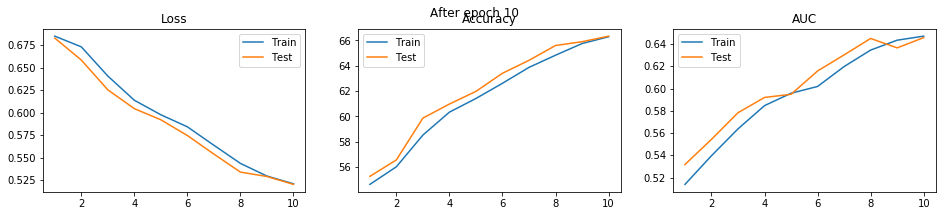

2019-02-11 20:41:51: After epoch 11, TRAIN acc is 66.5978, loss is 0.5147, AUC is 0.6514
2019-02-11 20:42:52: After epoch 11, TEST acc is 66.4300, loss is 0.5154, AUC is 0.6456
2019-02-11 20:53:18: After epoch 12, TRAIN acc is 66.8500, loss is 0.5104, AUC is 0.6541
2019-02-11 20:54:15: After epoch 12, TEST acc is 66.6600, loss is 0.5115, AUC is 0.6500
2019-02-11 21:04:36: After epoch 13, TRAIN acc is 67.0356, loss is 0.5061, AUC is 0.6552
2019-02-11 21:05:34: After epoch 13, TEST acc is 66.7100, loss is 0.5130, AUC is 0.6613
2019-02-11 21:15:53: After epoch 14, TRAIN acc is 67.2178, loss is 0.5025, AUC is 0.6559
2019-02-11 21:16:50: After epoch 14, TEST acc is 67.1300, loss is 0.5037, AUC is 0.6625
2019-02-11 21:27:12: After epoch 15, TRAIN acc is 67.3344, loss is 0.4995, AUC is 0.6572
2019-02-11 21:28:11: After epoch 15, TEST acc is 67.2700, loss is 0.5021, AUC is 0.6601
2019-02-11 21:38:36: After epoch 16, TRAIN acc is 67.4222, loss is 0.4976, AUC is 0.6580
2019-02-11 21:39:34: After

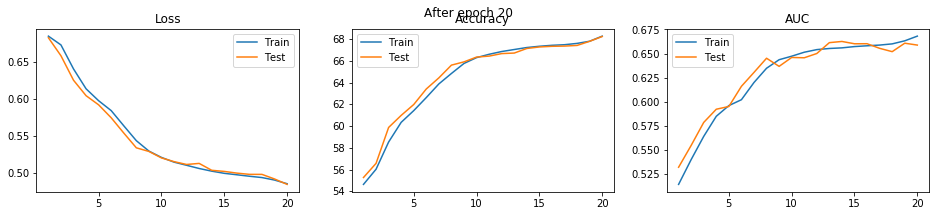

2019-02-11 22:35:42: After epoch 21, TRAIN acc is 68.4522, loss is 0.4804, AUC is 0.6685
2019-02-11 22:36:42: After epoch 21, TEST acc is 68.3200, loss is 0.4843, AUC is 0.6677
2019-02-11 22:47:03: After epoch 22, TRAIN acc is 68.7478, loss is 0.4767, AUC is 0.6706
2019-02-11 22:48:02: After epoch 22, TEST acc is 68.5500, loss is 0.4794, AUC is 0.6689
2019-02-11 22:58:24: After epoch 23, TRAIN acc is 68.9122, loss is 0.4732, AUC is 0.6726
2019-02-11 22:59:22: After epoch 23, TEST acc is 68.6700, loss is 0.4754, AUC is 0.6685
2019-02-11 23:09:38: After epoch 24, TRAIN acc is 68.9822, loss is 0.4704, AUC is 0.6731
2019-02-11 23:10:39: After epoch 24, TEST acc is 68.9700, loss is 0.4723, AUC is 0.6707
2019-02-11 23:21:03: After epoch 25, TRAIN acc is 69.1078, loss is 0.4683, AUC is 0.6740
2019-02-11 23:22:03: After epoch 25, TEST acc is 68.9100, loss is 0.4738, AUC is 0.6743
2019-02-11 23:32:27: After epoch 26, TRAIN acc is 69.1544, loss is 0.4666, AUC is 0.6751
2019-02-11 23:33:25: After

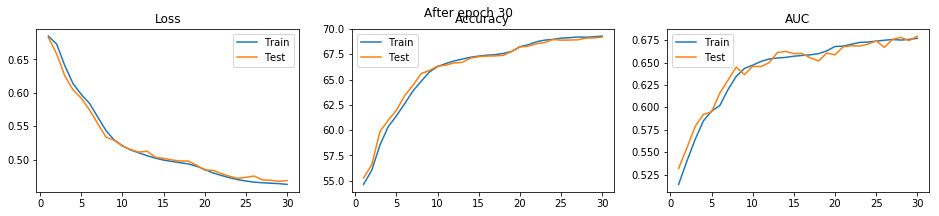

2019-02-12 00:29:22: After epoch 31, TRAIN acc is 69.2856, loss is 0.4625, AUC is 0.6765
2019-02-12 00:30:22: After epoch 31, TEST acc is 69.1300, loss is 0.4679, AUC is 0.6818
2019-02-12 00:40:47: After epoch 32, TRAIN acc is 69.2900, loss is 0.4623, AUC is 0.6767
2019-02-12 00:41:46: After epoch 32, TEST acc is 68.9000, loss is 0.4708, AUC is 0.6738
2019-02-12 00:52:09: After epoch 33, TRAIN acc is 69.3333, loss is 0.4617, AUC is 0.6776
2019-02-12 00:53:08: After epoch 33, TEST acc is 69.1300, loss is 0.4684, AUC is 0.6788
2019-02-12 01:03:33: After epoch 34, TRAIN acc is 69.3222, loss is 0.4613, AUC is 0.6773
2019-02-12 01:04:31: After epoch 34, TEST acc is 69.1600, loss is 0.4681, AUC is 0.6729
2019-02-12 01:14:56: After epoch 35, TRAIN acc is 69.2878, loss is 0.4612, AUC is 0.6767
2019-02-12 01:15:54: After epoch 35, TEST acc is 69.0700, loss is 0.4671, AUC is 0.6747
2019-02-12 01:26:20: After epoch 36, TRAIN acc is 69.3633, loss is 0.4608, AUC is 0.6776
2019-02-12 01:27:20: After

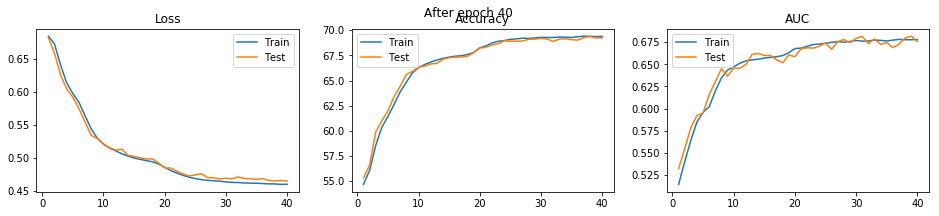

2019-02-12 02:23:24: After epoch 41, TRAIN acc is 69.4133, loss is 0.4594, AUC is 0.6787
2019-02-12 02:24:22: After epoch 41, TEST acc is 69.2600, loss is 0.4674, AUC is 0.6763
2019-02-12 02:34:49: After epoch 42, TRAIN acc is 69.4067, loss is 0.4592, AUC is 0.6784
2019-02-12 02:35:48: After epoch 42, TEST acc is 69.2800, loss is 0.4648, AUC is 0.6741
2019-02-12 02:46:15: After epoch 43, TRAIN acc is 69.4322, loss is 0.4592, AUC is 0.6789
2019-02-12 02:47:12: After epoch 43, TEST acc is 69.3000, loss is 0.4657, AUC is 0.6718
2019-02-12 02:57:38: After epoch 44, TRAIN acc is 69.4156, loss is 0.4591, AUC is 0.6785
Epoch    43: reducing learning rate of group 0 to 2.5000e-04.
2019-02-12 02:58:38: After epoch 44, TEST acc is 69.1900, loss is 0.4671, AUC is 0.6757
2019-02-12 03:09:03: After epoch 45, TRAIN acc is 69.5478, loss is 0.4569, AUC is 0.6806
2019-02-12 03:10:02: After epoch 45, TEST acc is 69.1100, loss is 0.4632, AUC is 0.6855
2019-02-12 03:20:30: After epoch 46, TRAIN acc is 69.

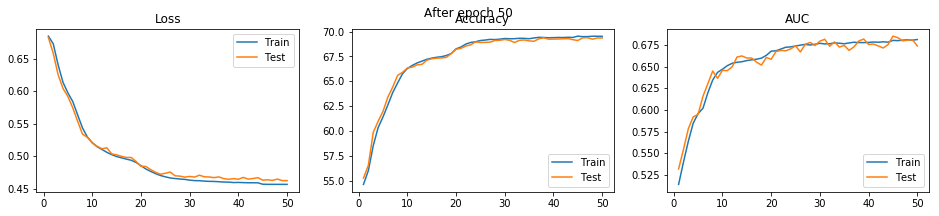

2019-02-12 04:17:33: After epoch 51, TRAIN acc is 69.5478, loss is 0.4566, AUC is 0.6819
2019-02-12 04:18:32: After epoch 51, TEST acc is 69.1900, loss is 0.4631, AUC is 0.6793


In [ ]:
total_epochs = 200
wandb.config.update(dict(epochs=total_epochs), allow_val_change=True)

train(large_batch_no_dropout_test_model, train_dataloader, test_dataloader, 
      num_epochs=total_epochs - current_epoch, epochs_to_test=1, epochs_to_graph=10, 
      num_batches_to_print=10000, start_epoch=current_epoch)